In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from strategy import get_data,Strategy
# plt.style.use('seaborn')

In [5]:
df_dict = {}
coin_list = ['BTC']
for coin in coin_list:
    df_dict[coin] = get_data(coin)

In [6]:
df = df_dict['BTC']

In [5]:
# 假日時段：UTC+0 週五 22:00 - 週日 22:00

APY: 47.50 %
MDD: 10.14 %
MDD Duration 62 days 22:50:00
worst trade: -7.97 %
2022-06-19 09:15:00 ~ 2022-06-19 22:00:00
avg holding days: 0.45 days
--------------------------------------------
PF: 1.82
Sharpe Ratio: 2.29
Calmar Ratio: 4.01
Sortino Ratio: 3.23
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.24 %
Total Time Exposure : 24.63 %
Total Trades: 363
Win Rate: 74.10 %
--------------------------------------------
PF * Win Rate: 1.350


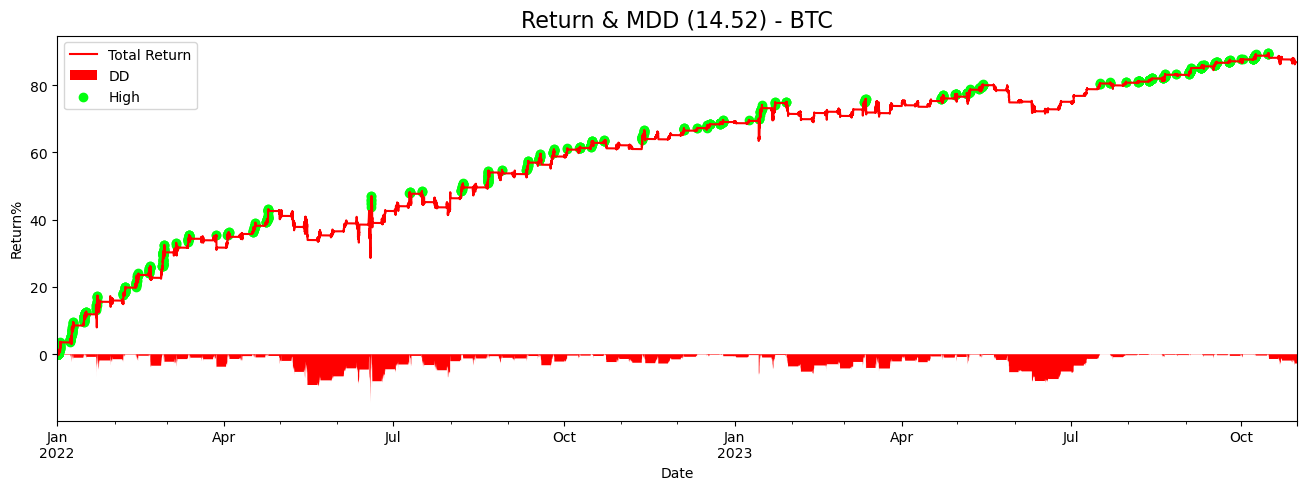

In [7]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
params = {'window': 90}
config = {'freq':'5min', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = get_data(coin)
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
analyze.show_pf_analysis(params, side, coin, axv_index=[])

In [1]:
start= '2022-01-01'
end ='2023-09-27'

params={
   'window': [12*1, 12*24, 3],
    }
    
config = {'freq':'5min','fee': 0.0003}
symbol_list = ['BTC','ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end],['2023-01-01',end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

NameError: name 'MultiTester' is not defined

In [5]:
all_params = multi_test.multi_params(['BTC','LTC','XRP','BCH'],sample_sets,direction='L/S')
trades, value_df = multi_test.multi_params_result(all_params)
multi_test.save_version_result(all_params,value_df,trades,1)
all_params

======================= BTC L/S Optimize Test =======================

---------- BTC Long ----------
Optimization trails: 92


 15%|█▌        | 14/92 [00:05<00:28,  2.76it/s]


KeyboardInterrupt: 